In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [2]:
# import dataset
dataset=pd.read_csv(r"C:\Users\Lenovo\Downloads\delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: >

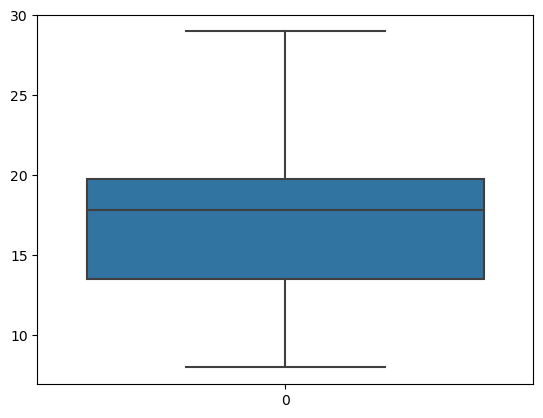

In [5]:
sns.boxplot(dataset['delivery_time'])

<Axes: >

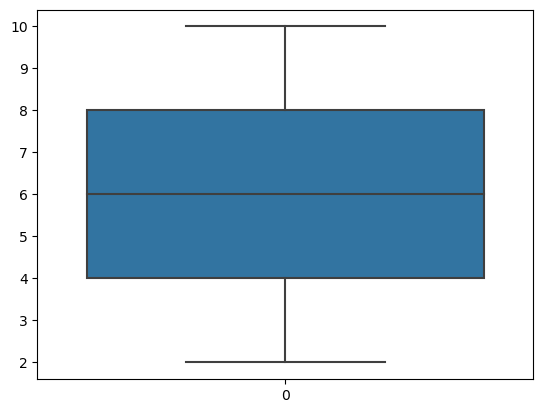

In [6]:
sns.boxplot(dataset['sorting_time'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11548\2509909043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

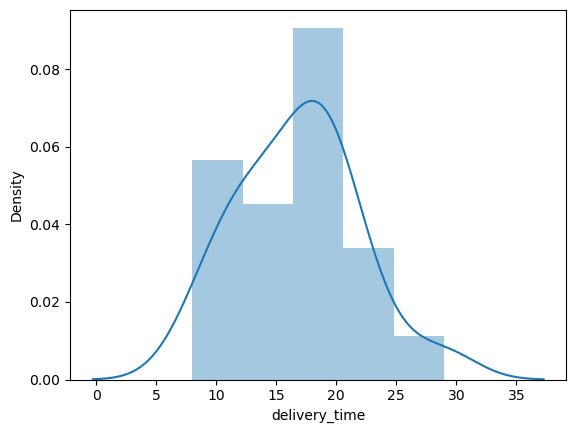

In [7]:
sns.distplot(dataset['delivery_time'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11548\2417891817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

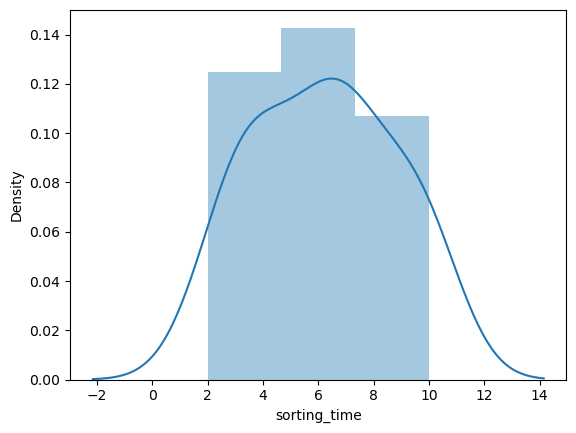

In [8]:
sns.distplot(dataset['sorting_time'])

## Correlation Analysis

In [9]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Model Building

In [10]:
model=sm.ols("delivery_time~sorting_time",data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        15:26:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

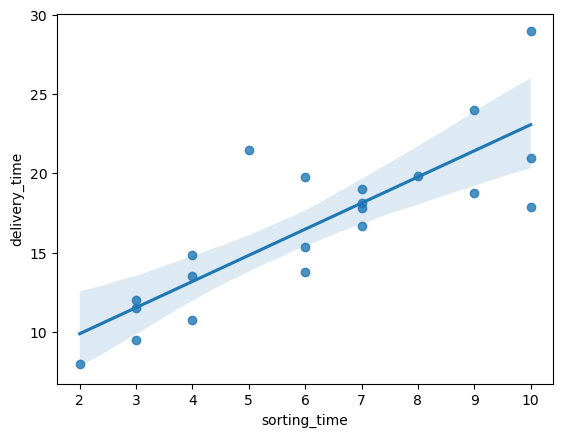

In [11]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

## Model Testing

In [12]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [15]:
model1 = sm.ols('delivery_time~np.log(sorting_time)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.64e-06
Time:                        15:26:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model2 = sm.ols('np.log(delivery_time)~sorting_time', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):           1.59e-06
Time:                           15:26:47   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
dataset['Sorting_sq']=dataset.sorting_time*dataset.sorting_time
dataset

,delivery_time,sorting_time,Sorting_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [18]:
model3 = sm.ols("np.log(delivery_time)~sorting_time+Sorting_sq",data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):           2.20e-06
Time:                           15:26:47   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time     0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_sq      -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Predictions

In [19]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [20]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [22]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [23]:
predicted = pd.DataFrame()
predicted['sorting_time'] = dataset.sorting_time
predicted['delivery_time'] = dataset.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.972032
1,4,13.50,12.725123
2,6,19.75,15.716034
3,9,24.00,21.570707
4,10,29.00,23.972032
5,6,15.35,15.716034
6,7,19.00,17.465597
7,3,9.50,11.450423
8,10,17.90,23.972032
9,9,18.75,21.570707


In [24]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = dataset.sorting_time
predicted1['delivery_time'] = dataset.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
